In [6]:
"""
https://file-examples.com/wp-content/uploads/2017/11/file_example_WAV_1MG.wav
https://file-examples.com/wp-content/uploads/2017/11/file_example_WAV_2MG.wav
https://freewavesamples.com/files/Alesis-Fusion-Acoustic-Bass-C2.wav
https://www.pacdv.com/sounds/people_sound_effects/applause-3.wav
"""


from google.colab import drive
drive.mount('/content/gdrive/')

!ls
%cd "gdrive/My Drive/Colab Notebooks"
!ls
#!ls "/content/gdrive/My Drive/Colab Notebooks"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
'A15 Input.wav'		 'A30 Spectrogram II w Record-Copy1.ipynb'   web_dl.wav
 A25_Colab.ipynb	 'A30 Spectrogram II w Record-Copy2.ipynb'
'A25 Spectrogram.ipynb'   Untitled
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks'
/content/gdrive/My Drive/Colab Notebooks
'A15 Input.wav'		 'A30 Spectrogram II w Record-Copy1.ipynb'   web_dl.wav
 A25_Colab.ipynb	 'A30 Spectrogram II w Record-Copy2.ipynb'
'A25 Spectrogram.ipynb'   Untitled


In [0]:

from ipywidgets import widgets
from IPython.display import display



# Global variables that are used inside functions.
# file stores the main audio stream to be played.
# wave_obj is the audio stream player.
global file

# ipywidgets GUI elements. 
button_f = widgets.Button(
    description  = "Visualize.",
    disabled     = False,
    button_style = "", # "success", "info", "warning", "danger" or ""
    tooltip      = "Visualize selected file.",
    icon         = "bar-chart"
)

button_u = widgets.Button(
    description  = "Visualize.",
    disabled     = False,
    button_style = "", # "success", "info", "warning", "danger" or ""
    tooltip      = "Visualize selected link.",
    icon         = "bar-chart"
)

Locl = widgets.Text(
    value       = "Enter path to file.",
    placeholder = "Type something",
    description = "File:",
    disabled    = False
)

URL = widgets.Text(
    value       = "Enter valid URL.",
    placeholder = "Type something",
    description = "URL:",
    disabled    = False
)



# Layout GUI elements.
items     = [Locl, URL, button_f, button_u]
box_left  = widgets.VBox([items[0], items[1]])
box_right = widgets.VBox([items[2], items[3]])
VBox      = widgets.HBox([box_left, box_right])
output    = widgets.Output()




In [0]:
import requests

def on_f_clicked(b):
    with output:
        global file
        file = Locl.value
        visualize(file)

def on_u_clicked(b):
    with output:
        global file
        out_file = "web_dl.wav" # Name of local file to dl to.
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:77.0) Gecko/20100101 Firefox/77.0'}
        response = requests.get(URL.value, allow_redirects=True, headers=headers)
        open(out_file, 'wb').write(response.content)
        file = out_file
        visualize(file)

button_f.on_click(on_f_clicked)
button_u.on_click(on_u_clicked)

In [0]:
# Modules for making a spectrogram from a file.
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav
import librosa
import librosa.display

# Plot to graphs. One that shows amplitude.
# And one that shows frequency, time, and dB.
def visualize(file):

    print(file)

    # Plot amplitude.
    # Read it straight from the file, and then plot it.
    y, sr = wav.read(file)
    %matplotlib inline
    plt.plot(sr)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()
    
    # Plot mel power spectrogram. 
    # Read from file.
    y, sr = librosa.load(file)
    
    # Make spectrogram S.
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    # Scale S to the relevant information for better readability.
    log_S = librosa.power_to_db(S, ref=np.max)
    
    # Display the spectrogram
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()


Output()

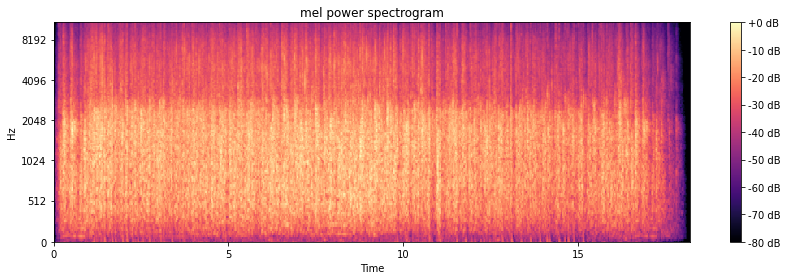

In [10]:
# Display GUI elements.
display(VBox, output)
#display(Locl, URL, button_u, button_f, output)